# Project: Ford GoBike Trip

## Table of Contents

<ul>
<li><a href="#wrangling"> 1- Preliminary Wrangling</a></li>
    <li><a href="#Assess">     1.1 - Assess</a></li>
    <li><a href="#clean">     1.2 - Clean</a></li>
<li><a href="#Univariate">Univariate Exploration</a></li>
<li><a href="#Bivariate">Bivariate Exploration</a></li>
<li><a href="#Multivariate">Multivariate Exploration</a></li>
<li><a href="#Overall Observation">Overall Observation</a></li>
</ul>

<a id='wrangling'></a>
## 1- Preliminary Wrangling

This document explores a dataset containing bike trips and their data for approximately 174,952 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_main = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id='Assess'></a>
### 1.1 - Assess 
#### Physical and programatic Assess 

In [3]:
# high-level overview of data shape and composition
print(df_main.shape)
print(df_main.dtypes)
print(df_main.info())

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id      

In [4]:
print(df_main.head(10))

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6          1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7          1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8          1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9          1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   

In [5]:
## Show unique data of categorical columns 
print(df_main.user_type.unique())
print(df_main.member_gender.unique())
print(df_main.bike_share_for_all_trip.unique())

['Customer' 'Subscriber']
['Male' nan 'Other' 'Female']
['No' 'Yes']


In [6]:
print(df_main.start_station_name.unique())

['Montgomery St BART Station (Market St at 2nd St)'
 'The Embarcadero at Steuart St' 'Market St at Dolores St'
 'Grove St at Masonic Ave' 'Frank H Ogawa Plaza'
 '4th St at Mission Bay Blvd S' 'Palm St at Willow St'
 'Washington St at Kearny St' 'Post St at Kearny St' 'Jones St at Post St'
 'Civic Center/UN Plaza BART Station (Market St at McAllister St)'
 'Valencia St at 21st St' 'Channing Way at Shattuck Ave'
 'Bancroft Way at College Ave' 'Howard St at Mary St'
 '22nd St at Dolores St' 'Laguna St at Hayes St' '5th St at Folsom'
 'Telegraph Ave at 23rd St' 'Page St at Scott St'
 'Lake Merritt BART Station' 'West St at 40th St'
 'The Embarcadero at Sansome St' 'Folsom St at 9th St'
 'University Ave at Oxford St' 'MLK Jr Way at University Ave'
 'The Embarcadero at Bryant St' '17th St at Valencia St'
 'Valencia St at 16th St' 'Valencia St at 22nd St' 'Franklin Square'
 'San Pablo Ave at MLK Jr Way' '19th St at Mission St'
 'Market St at 10th St' 'Folsom St at 13th St'
 'San Francisco Fer

In [7]:
print(df_main.end_station_name.unique())

['Commercial St at Montgomery St' 'Berry St at 4th St'
 'Powell St BART Station (Market St at 4th St)' 'Central Ave at Fell St'
 '10th Ave at E 15th St' 'Broadway at Kearny' 'San Jose Diridon Station'
 'Valencia St at 21st St' 'Mission Playground'
 'San Francisco Public Library (Grove St at Hyde St)'
 'Bryant St at 2nd St' 'Shattuck Ave at Hearst Ave'
 'Channing Way at Shattuck Ave' '8th St at Ringold St'
 'Broderick St at Oak St' 'Potrero Ave and Mariposa St'
 'Market St at Franklin St' 'Telegraph Ave at 23rd St'
 '17th St at Dolores St' '6th Ave at E 12th St (Temporary Location)'
 'McAllister St at Baker St' 'Telegraph Ave at Carleton St'
 'Genoa St at 55th St' 'Grand Ave at Perkins St'
 'San Francisco Ferry Building (Harry Bridges Plaza)'
 'Folsom St at 9th St' 'Channing Way at San Pablo Ave'
 '2nd St at Townsend St' 'Pierce St at Haight St'
 'Potrero del Sol Park (25th St at Utah St)' 'Valencia St at 22nd St'
 'Jackson Playground' 'Dolores St at 15th St' '29th St at Church St'
 '19

In [8]:
## Show the rows in which member gender equal other
df_main.loc[df_main.member_gender == 'Other']

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
131,1187,2019-02-28 22:39:58.5600,2019-02-28 22:59:46.2060,262.0,West St at University Ave,37.869967,-122.286533,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,5649,Subscriber,1993.0,Other,No
135,544,2019-02-28 22:48:12.7300,2019-02-28 22:57:17.0800,356.0,Valencia St at Clinton Park,37.769188,-122.422285,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,6065,Subscriber,1991.0,Other,No
190,515,2019-02-28 22:28:11.3470,2019-02-28 22:36:46.3890,58.0,Market St at 10th St,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,-122.403071,5234,Subscriber,1981.0,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183346,312,2019-02-01 02:06:04.5660,2019-02-01 02:11:17.1220,175.0,49th St at Telegraph Ave,37.835946,-122.262366,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,5450,Subscriber,1997.0,Other,Yes
183349,527,2019-02-01 01:48:54.7550,2019-02-01 01:57:42.5400,213.0,32nd St at Adeline St,37.823847,-122.281193,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,1172,Subscriber,1997.0,Other,Yes
183378,659,2019-02-01 00:53:36.1430,2019-02-01 01:04:35.3710,47.0,4th St at Harrison St,37.780955,-122.399749,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4960,Subscriber,1985.0,Other,No
183381,426,2019-02-01 00:48:54.1590,2019-02-01 00:56:00.4740,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,213.0,32nd St at Adeline St,37.823847,-122.281193,3535,Subscriber,1997.0,Other,Yes


In [9]:
## Show descriptive data of quantitative columns 
df_main.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
## Check member_birth_year values
a = pd.Series(df_main['member_birth_year'].unique()).sort_values()
a

65    1878.0
48    1900.0
66    1901.0
72    1902.0
73    1910.0
       ...  
27    1998.0
30    1999.0
18    2000.0
64    2001.0
1        NaN
Length: 76, dtype: float64

In [11]:
## Check member_birth_year values less than 1900 (as verified oldest people is 122 year )
df_main.loc[df_main.member_birth_year  < 1900 ]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No


<a id='clean'></a>
### 1.2 - Clean 

* convert dauration_sec to hours .
* Drop Nan Values . 
* Drop member_birth_year values less than 1900 (as verified oldest person age is 122 year ) .
* Get the age of the users then drop usage year column used to get user_age .
* Change columns type :    
   (start_time , end_time ) to datetime64 .  
   (start_station_id , end_station_id , user_age) to int64 .  
   (start_station_name , end_station_name, bike_id , user_type , member_birth_year , member_gender ) to category .  
   (bike_share_for_all_trip) to boolean .     
 

In [12]:
## Copy the dataset
df = df_main.copy()


In [13]:
df = df.rename(columns={"duration_sec": "duration_hour"})
df.duration_hour = df.duration_hour / 3600
df.duration_hour = df.duration_hour.round(decimals=2)
df

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,14.50,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,11.81,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,17.18,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,10.14,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,0.44,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,0.13,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,0.09,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,0.04,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,0.04,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [14]:
## Drop Nan Values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_hour            174952 non-null  float64
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [15]:
## Drop member_birth_year values less than 1900 (as verified oldest person age is 122 year ) .
df = df.loc[df.member_birth_year  > 1900 ]
b = pd.Series(df['member_birth_year'].unique()).sort_values()
b

63    1901.0
69    1902.0
70    1910.0
60    1920.0
72    1927.0
       ...  
15    1997.0
26    1998.0
29    1999.0
17    2000.0
62    2001.0
Length: 73, dtype: float64

In [16]:
## Get the age of the users then drop usage year column used to get user_age .
df['usage_year'] = pd.DatetimeIndex(df['start_time']).year
df['user_age'] =  df['usage_year'] - df['member_birth_year']

df['user_age'] = df['user_age'].astype(int)
df['member_birth_year'] = df['member_birth_year'].astype(int)

c = pd.Series(df['user_age'].unique()).sort_values()
df.drop(['usage_year'], axis='columns', inplace=True)

print(c)

62     18
17     19
29     20
26     21
15     22
     ... 
72     92
60     99
70    109
69    117
63    118
Length: 73, dtype: int32


In [17]:
## Change columns type : 
## (start_time , end_time ) to datetime64 .
## (start_station_id , end_station_id , user_age) to int64 .
## (start_station_name , end_station_name, bike_id , user_type , member_birth_year , member_gender ) to category .
## (bike_share_for_all_trip) to boolean .

convert_dict = {'start_time': 'datetime64',
                'end_time': 'datetime64',
                'start_station_id': 'int64',
                'end_station_id': 'int64',
                'user_age': 'int64',
                'start_station_name': 'category',
                'end_station_name': 'category',
                'bike_id': 'category',
                'user_type': 'category',
                'member_birth_year': 'category',
                'member_gender': 'category',
                'bike_share_for_all_trip': bool
               }

df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174898 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_hour            174898 non-null  float64       
 1   start_time               174898 non-null  datetime64[ns]
 2   end_time                 174898 non-null  datetime64[ns]
 3   start_station_id         174898 non-null  int64         
 4   start_station_name       174898 non-null  category      
 5   start_station_latitude   174898 non-null  float64       
 6   start_station_longitude  174898 non-null  float64       
 7   end_station_id           174898 non-null  int64         
 8   end_station_name         174898 non-null  category      
 9   end_station_latitude     174898 non-null  float64       
 10  end_station_longitude    174898 non-null  float64       
 11  bike_id                  174898 non-null  category      
 12  user_type       

In [18]:
df.reset_index(drop=True)

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,14.50,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,True,35
1,17.18,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,True,47
2,10.14,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,True,30
3,0.44,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True,45
4,0.50,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,True,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174893,0.13,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,True,23
174894,0.09,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,True,35
174895,0.04,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,True,29
174896,0.04,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,True,31


In [19]:
## The most 15 start &end stations that have high customers density 
start_st = df['start_station_name'].value_counts()[:15].index
end_st = df['end_station_name'].value_counts()[:15].index

df_15 = df.loc[(df['start_station_name'].isin(start_st)) & (df['end_station_name'].isin(end_st))]
df_15 = df_15.reset_index(drop=True)
df_15.head()

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,0.11,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6,The Embarcadero at Sansome St,37.804770,-122.403234,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6531,Customer,2000,Male,True,19
1,0.15,2019-02-28 22:58:06.628,2019-02-28 23:07:09.508,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1936,Subscriber,1995,Male,True,24
2,0.10,2019-02-28 23:00:05.223,2019-02-28 23:06:21.515,58,Market St at 10th St,37.776619,-122.417385,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5731,Subscriber,1982,Male,True,37
3,0.09,2019-02-28 22:48:04.158,2019-02-28 22:53:29.926,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5012,Subscriber,1990,Male,True,29
4,1.39,2019-02-28 21:22:51.632,2019-02-28 22:46:10.114,6,The Embarcadero at Sansome St,37.804770,-122.403234,16,Steuart St at Market St,37.794130,-122.394430,5149,Customer,1987,Male,True,32


### What is the structure of your dataset?

There are 174,898 trips recorded with complete data in the dataset , these data divided to four dimensions ( trip time , start and end location , bike data and user data ).
the data differ between numeric and categorical .


### What is/are the main feature(s) of interest in your dataset?
I will investigate the data in the locations that have the most density as this will help in marketing specially in ( customer targeting & offers ) to increase sales .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main Variable that will help me is the locations that has the most density and then I will investigate the relation between them and the other variables .

So That , in cleaning I choosed in new dataset with the data that include the most 15 start and end stations that have density


<a id='Univariate'></a>
## 1 - Univariate Exploration

I will check :   
    * All locations and the most 15 start and end stations that has high density.  
    * The customer characteristics and the common trip duration for both of them  and see if there is difference or the same distribution.  
    



### 1.1 - Locations
I'll start by looking at the main variable of interest: 
 Then the most 15 start & end stations that have high customers density  .




####  What is the distribution of The most 15 start & end stations that have high customers density ? 


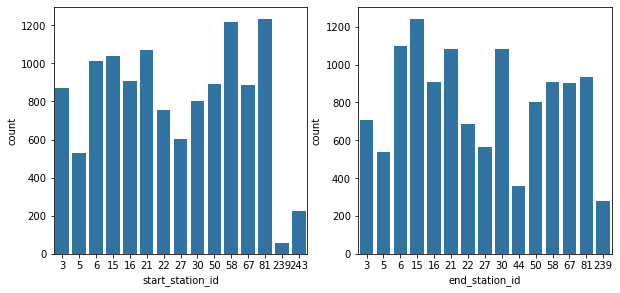

In [20]:
## The most 15 start &end stations that have high customers density 
plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[0]

plt.subplot (2,2,1)
sb.countplot(data=df_15, x='start_station_id', color=base_color);

plt.subplot (2,2,2)
sb.countplot(data=df_15, x='end_station_id', color=base_color);

#### Observation : it seems random .

### 1.2 - Customers characteristics


####  What are Customers characteristics (all locations) ?
Let's check users characteristics for all locations 

Text(0.5, 0, 'user_age')

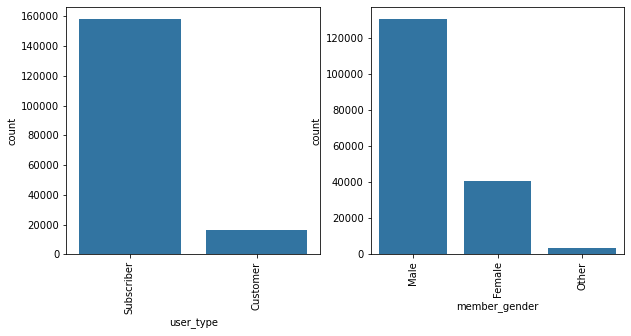

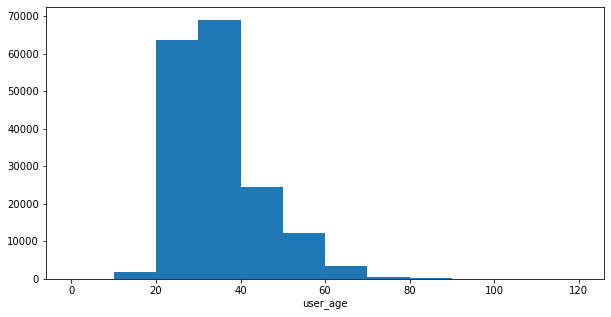

In [21]:
## user related data (user_type ,member_gender ) for all locations
plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[0]


plt.subplot (2,2,1)
freq_c = df['user_type'].value_counts()
gen_order_c = freq_c.index  
sb.countplot(data=df, x='user_type', color=base_color, order=gen_order_c) ;
plt.xticks(rotation=90)


plt.subplot (2,2,2)
freq_d = df['member_gender'].value_counts()
gen_order_d = freq_d.index  
sb.countplot(data=df, x='member_gender', color=base_color, order=gen_order_d);
plt.xticks(rotation=90)


log_binsize = 0.025
bins = 10 ** np.arange(0.5, np.log10(df['user_age'].max())+log_binsize, log_binsize)

plt.figure(figsize = [10, 5])
bins = np.arange(0, df['user_age'].max()+10, 10)
plt.hist(data=df, x='user_age', color=base_color, bins = bins) ;
plt.xlabel('user_age')

There's a long tail in the distribution, so let's put it on a log scale instead

In [22]:
## describe the user age
np.log10(df['user_age'].describe())

count    5.242785
mean     1.533652
std      1.000380
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.071882
Name: user_age, dtype: float64

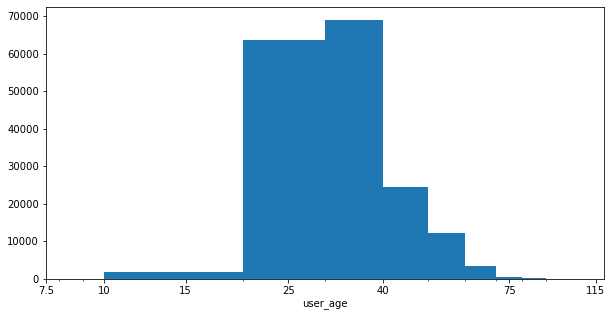

In [23]:
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'user_age', bins = bins)
plt.xscale('log')
plt.xticks([7.5 ,10, 15, 25, 40, 75 , 115 ], [7.5 ,10, 15, 25, 40, 75 , 115 ])
plt.xlim((7.5,120))
plt.xlabel('user_age')
plt.show()

#### Observation The Common users characteristics for all locations are  ( Type : Subscribers , Gender : Male , Age : from 20 to 40 )


#### What are Customers characteristics (high density locations) ?
Next up, let's check the customers characteristics used bikes for most 15 start and end stations that have high density .

Text(0.5, 0, 'user_age')

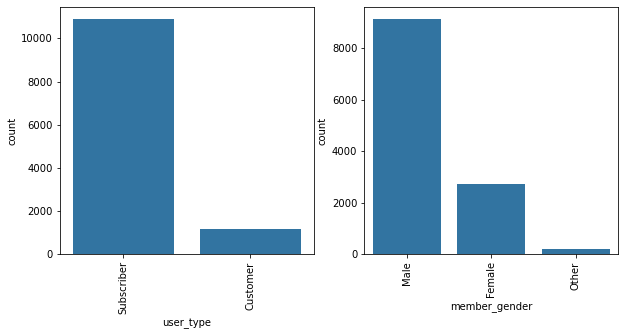

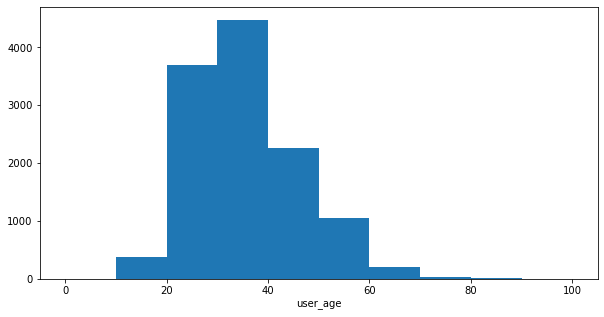

In [24]:
## The user related data (user_type ,member_gender ) for most 15 start and end stations that have high density.
plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[0]


plt.subplot (2,2,1)
freq_e = df_15['user_type'].value_counts()
gen_order_e = freq_e.index  
sb.countplot(data=df_15, x='user_type', color=base_color, order=gen_order_e) ;
plt.xticks(rotation=90)


plt.subplot (2,2,2)
freq_f = df_15['member_gender'].value_counts()
gen_order_f = freq_f.index  
sb.countplot(data=df_15, x='member_gender', color=base_color, order=gen_order_f);
plt.xticks(rotation=90)


plt.figure(figsize = [10, 5])
bins = np.arange(0, df_15['user_age'].max()+10, 10)
plt.hist(data=df_15, x='user_age', color=base_color, bins = bins) ;
plt.xlabel('user_age')


Again there's a long tail in the distribution, so let's put it on a log scale instead

In [25]:
## describe the user age
np.log10(df_15['user_age'].describe())

count    4.082570
mean     1.545147
std      1.019847
min      1.255273
25%      1.447158
50%      1.518514
75%      1.612784
max      1.995635
Name: user_age, dtype: float64

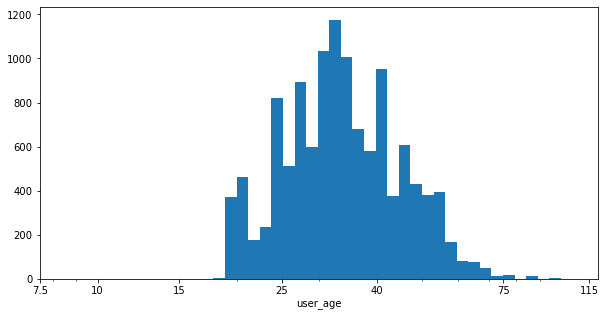

In [26]:
## log scale
log_binsize = 0.025
bins = 10 ** np.arange(0.5, np.log10(df_15['user_age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_15, x = 'user_age', bins = bins)
plt.xscale('log')
plt.xticks([7.5 ,10, 15, 25, 40, 75 , 115 ], [7.5 ,10, 15, 25, 40, 75 , 115 ])
plt.xlim((7.5,120))
plt.xlabel('user_age')
plt.show()

#### Observation : The users characterisitics in common even in all locations or the most density ( Type : Subscribers , Gender : Male , Age : from 20 to 40 )

###  Trip duration

#### What is the common trip duration for all locations ?

<AxesSubplot:xlabel='duration_hour', ylabel='Count'>

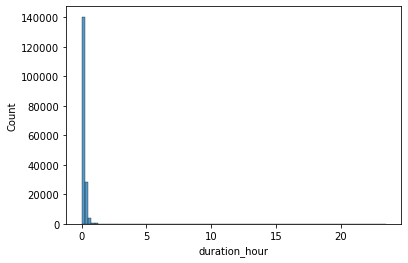

In [27]:
## Check for all locations
bin_edges = np.arange(0, df['duration_hour'].max()+0.25,0.25)
sb.histplot(df['duration_hour'], bins = bin_edges)


There's a long tail in the distribution, so let's put it on a log scale instead

In [28]:
## log scale
np.log10(df['duration_hour'].describe())

count    5.242785
mean    -0.708713
std     -0.340800
min     -1.698970
25%     -1.045757
50%     -0.853872
75%     -0.657577
max      1.370883
Name: duration_hour, dtype: float64

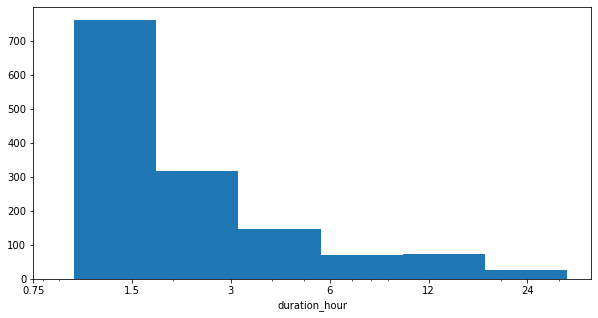

In [29]:
log_binsize = 0.25
bins = 10 ** np.arange(0, np.log10(df['duration_hour'].max())+log_binsize, log_binsize)


plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)
plt.xscale('log')
plt.xticks([0.75 ,1.5,3,6,12,24], [0.75 ,1.5,3,6,12,24])
plt.xlabel('duration_hour')
plt.show()

#### What is the common trip duration for locations with most density ?

<AxesSubplot:xlabel='duration_hour', ylabel='Count'>

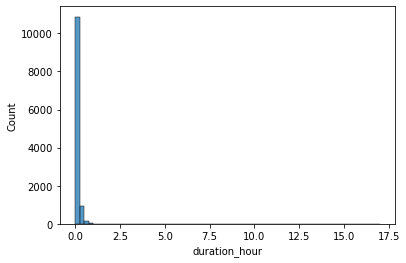

In [30]:
## Check for all locations
bin_edges = np.arange(0, df_15['duration_hour'].max()+0.25,0.25)
sb.histplot(df_15['duration_hour'], bins = bin_edges)

Again There's a long tail in the distribution, so let's put it on a log scale instead

In [31]:
## log scale
np.log10(df_15['duration_hour'].describe())

count    4.082570
mean    -0.747457
std     -0.410514
min     -1.698970
25%     -1.000000
50%     -0.853872
75%     -0.744727
max      1.225051
Name: duration_hour, dtype: float64

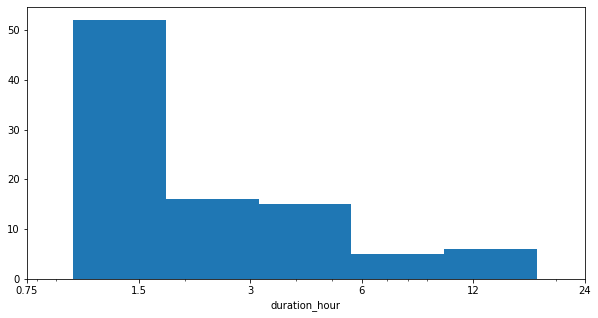

In [32]:
log_binsize = 0.25
bins = 10 ** np.arange(0, np.log10(df_15['duration_hour'].max())+log_binsize, log_binsize)


plt.figure(figsize=[10, 5])
plt.hist(data = df_15, x = 'duration_hour', bins = bins)
plt.xscale('log')
plt.xticks([0.75 ,1.5,3,6,12,24], [0.75 ,1.5,3,6,12,24])
plt.xlabel('duration_hour')
plt.show()

#### Observation : The common trip duration is from 1 to 2 hours

### What did I found ?

#### Observation :
* As conclusion our Target customer characterisitics  ( Type : Subscribers then customers , Gender : Male then female , Age : from 20 to 40 ) and the common duration they use the bikes are from 1 to 2 hours then 2 to 5 hours.

<a id='Bivariate'></a>

## 2- Bivariate Exploration

let's dig deep in the common customers characteristics and trip duration for each station even start or end to check if there is any variance.

#### What is the user type for each station ?

<AxesSubplot:xlabel='end_station_id', ylabel='count'>

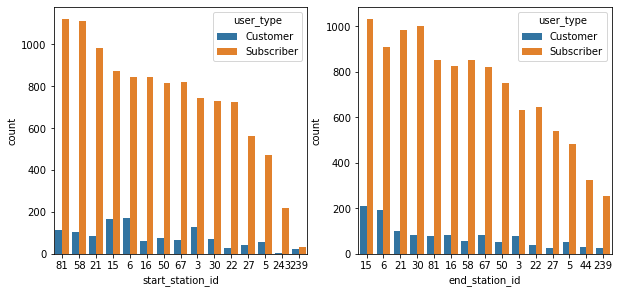

In [33]:
## Sub Plot the user_type for each station
plt.figure(figsize = [10, 10])

plt.subplot (2,2,1)
freq_g = df_15['start_station_id'].value_counts()
gen_order_g = freq_g.index  
sb.countplot(data = df_15, x = 'start_station_id', hue = 'user_type',order=gen_order_g)

plt.subplot (2,2,2)
freq_h = df_15['end_station_id'].value_counts()
gen_order_h = freq_h.index  
sb.countplot(data = df_15, x = 'end_station_id', hue = 'user_type',order=gen_order_h)


#### Observation : same as common user type above Subscriber then Customer .

#### What is the user gender for each station ?

<AxesSubplot:xlabel='end_station_id', ylabel='count'>

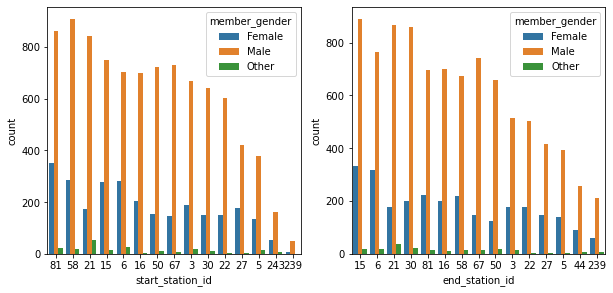

In [34]:
## Sub Plot the user_type for each station
plt.figure(figsize = [10, 10])

plt.subplot (2,2,1)
freq_i = df_15['start_station_id'].value_counts()
gen_order_i = freq_i.index  
sb.countplot(data = df_15, x = 'start_station_id', hue = 'member_gender',order=gen_order_i)

plt.subplot (2,2,2)
freq_j = df_15['end_station_id'].value_counts()
gen_order_j = freq_j.index  
sb.countplot(data = df_15, x = 'end_station_id', hue = 'member_gender',order=gen_order_j)


#### Observation : same as common user gender above Male is the common then female the other .

#### What is the avg. user age for each station ?

Text(0, 0.5, 'Avg user_age')

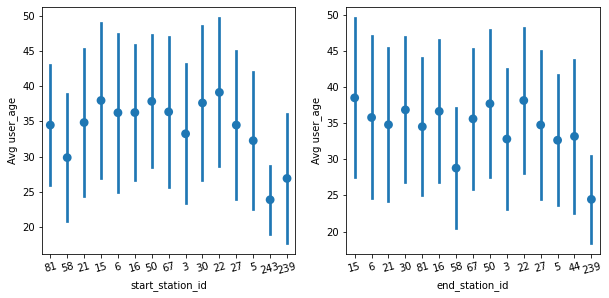

In [35]:
## Sub Plot the Avg user age for each station
plt.figure(figsize = [10, 10])

plt.subplot (2,2,1)
freq_k = df_15['start_station_id'].value_counts()
gen_order_k = freq_k.index 
sb.pointplot(data=df_15, x='start_station_id', y='user_age', color=base_color, ci='sd', linestyles="" , order=gen_order_k)
plt.xticks(rotation=15);
plt.ylabel('Avg user_age')

plt.subplot (2,2,2)
freq_l = df_15['end_station_id'].value_counts()
gen_order_l = freq_l.index 
sb.pointplot(data=df_15, x='end_station_id', y='user_age', color=base_color, ci='sd', linestyles="" , order=gen_order_l)
plt.xticks(rotation=15);
plt.ylabel('Avg user_age')

#### Observation : for each station same as common from 25 to 40 no bigh change .

#### What is the trip duration for each stationin common ?

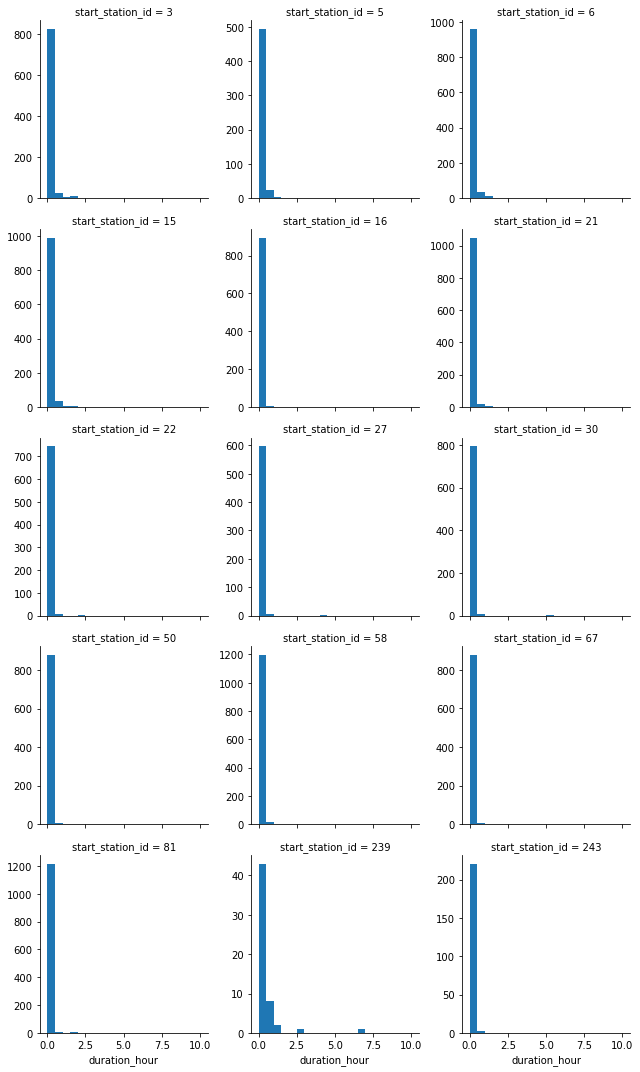

In [36]:
## Facetating the trip duration for each start station
bin_edges = np.arange(0, 10+0.5, 0.5)
g = sb.FacetGrid(data = df_15, col = 'start_station_id', col_wrap=3, sharey=False)
g.map(plt.hist, 'duration_hour', bins = bin_edges);

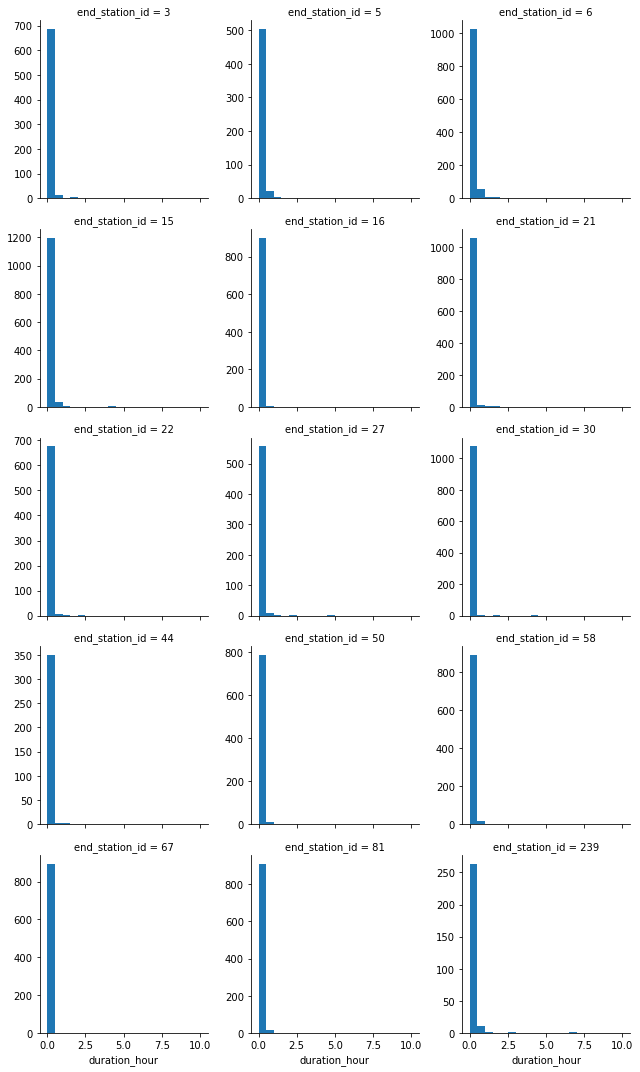

In [37]:
## Facetating the trip duration for each end station
bin_edges = np.arange(0, 10+0.5, 0.5)
g = sb.FacetGrid(data = df_15, col = 'end_station_id', col_wrap=3, sharey=False)
g.map(plt.hist, 'duration_hour', bins = bin_edges);

#### What is trip duration and age ?

Text(0, 0.5, 'Trip duration / hour')

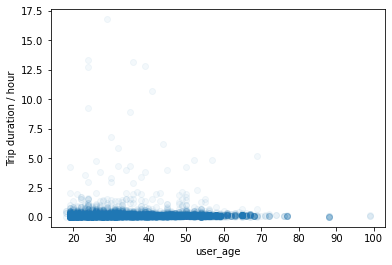

In [38]:
sb.regplot(data = df_15, x = 'user_age', y = 'duration_hour' , fit_reg= False, truncate=False, scatter_kws={'alpha':1/20});
plt.xlabel('user_age')
plt.ylabel('Trip duration / hour')


#### Observation : the age from 20 to 40 use the bikes more than 2 hours and reach to 17 hours

### What I found ?

### Observation :
* As conclusion after going deep in each stations that have most denisty we have found that each one have the same customer and trip characteristics of the all data we found above.
* Our Target customer characterisitics  ( Type : Subscribers then customers , Gender : Male then female , Age : from 20 to 40 ). 
* The common duration they use the bikes are from 1 to 2 hours then 2 to 5 hours.
* the age from 20 to 40 use the bikes more than 2 hours and reach to 17 hours.

<a id='Multivariate'></a>
## 3 - Multivariate Exploration

Let's see more relations between our data

####  What are start and end locations user type and age in multivariate ?

<AxesSubplot:xlabel='start_station_id', ylabel='user_age'>

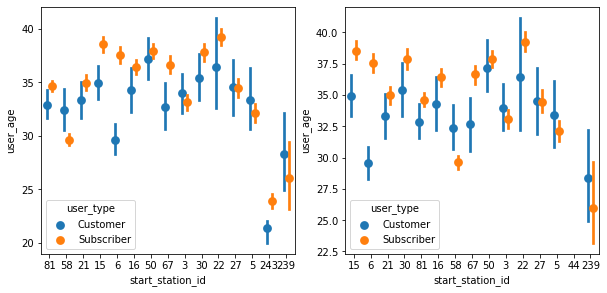

In [39]:
## Sub Plot For start and end locations (user type and age)
plt.figure(figsize = [10, 10])

plt.subplot (2,2,1)
freq_k = df_15['start_station_id'].value_counts()
gen_order_k = freq_k.index 
sb.pointplot(data = df_15, x = 'start_station_id', y ='user_age', hue = 'user_type',dodge = 0.3, linestyles = "" , order = gen_order_k)

plt.subplot (2,2,2)
freq_l = df_15['end_station_id'].value_counts()
gen_order_l = freq_l.index 
sb.pointplot(data = df_15, x = 'start_station_id', y ='user_age', hue = 'user_type',dodge = 0.3, linestyles = "" ,order = gen_order_l)


#### What are start and end locations User gender and age in multivariate ?

<AxesSubplot:xlabel='start_station_id', ylabel='user_age'>

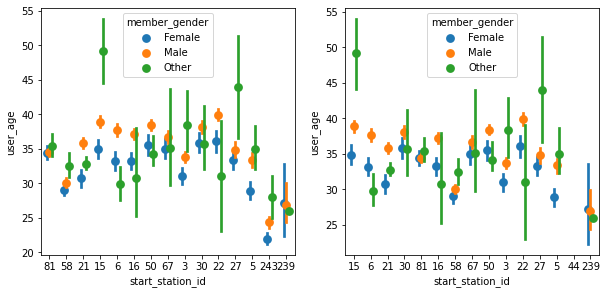

In [40]:
## Sub Plot For start and end locations (User gender and age)
plt.figure(figsize = [10, 10])

plt.subplot (2,2,1)
freq_k = df_15['start_station_id'].value_counts()
gen_order_k = freq_k.index 
sb.pointplot(data = df_15, x = 'start_station_id', y ='user_age', hue = 'member_gender',dodge = 0.3, linestyles = "" , order = gen_order_k)

plt.subplot (2,2,2)
freq_l = df_15['end_station_id'].value_counts()
gen_order_l = freq_l.index 
sb.pointplot(data = df_15, x = 'start_station_id', y ='user_age', hue = 'member_gender',dodge = 0.3, linestyles = "" ,order = gen_order_l)


#### Observation : Confim our observation above

<a id='Overall Observation'></a>
## 4 - Overall Observation
 
The targeted customers characteristics :    

1- Gender : Male   .    
2- Type : Subscriber  .   
3- Age : 20 to 40 .    
4-  Most common trip hour from 1 to 2 hours .     

we checked and find these conclusion throw our journey thus we could get use of these by :
* For low density customers stations we can use these targeted customers in marketing and offers which will increase the revenue of the company.    
* For high density customers stations if there still work capicity available we can increase revenues by 2 ways :   
1- Offers for females between 20 to 40 years even for subscriber or customer type.   
2- More engagement for targeted customer with above characteristics .

## Tahnks :)